In [2]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from pandas.plotting import scatter_matrix


from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU

from keras import optimizers

from keras.optimizers import SGD

from sklearn.model_selection import train_test_split


print("Python Version: {}".format(sys.version))
print("SKLearn Version: {}".format(sklearn.__version__))
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("TensorFlow Version: {}".format(tf.__version__))

Python Version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
SKLearn Version: 0.23.2
Pandas Version: 1.0.1
Numpy Version: 1.18.1
TensorFlow Version: 2.3.0


In [3]:
df = pd.read_csv(r'C:\01 Study Materials\01 Thesis\Heart-Disease-Prediction-master\heart-data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    int64  
 2   cp        907 non-null    int64  
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    int64  
 7   thalach   907 non-null    int64  
 8   exang     907 non-null    int64  
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    int64  
 11  ca        907 non-null    int64  
 12  thal      907 non-null    int64  
 13  target    907 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 99.3 KB


In [5]:
df = df.apply(pd.to_numeric)

In [6]:
cols_to_norm = ['age', 'trestbps','chol', 'thalach', 'thal']

df_normalized = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

## Add back in our other columns

df_normalized['sex'] = df['sex']
df_normalized['cp'] = df['cp']
df_normalized['fbs'] = df['fbs']
df_normalized['restecg'] = df['restecg']
df_normalized['exang'] = df['exang']
df_normalized['oldpeak'] = df['oldpeak']
df_normalized['slope'] = df['slope']
df_normalized['ca'] = df['ca']
df_normalized['target'] = df['target']
df_normalized

,age,trestbps,chol,thalach,thal,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,target
0,0.708333,0.481132,0.244292,0.603053,0.333333,1,3,1,0,0,2.3,0,0,1
1,0.166667,0.339623,0.283105,0.885496,0.666667,1,2,0,1,0,3.5,0,0,1
2,0.250000,0.339623,0.178082,0.770992,0.666667,0,1,0,0,0,1.4,2,0,1
3,0.562500,0.245283,0.251142,0.816794,0.666667,1,1,0,1,0,0.8,2,0,1
4,0.583333,0.245283,0.520548,0.702290,0.666667,0,0,0,1,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0.458333,0.433962,0.392694,0.389313,1.000000,1,1,0,0,1,4.2,1,4,1
903,0.291667,0.358491,0.276256,0.549618,1.000000,1,3,1,1,1,0.1,1,4,1
904,0.687500,0.415094,0.383562,0.267176,0.333333,0,1,0,1,0,1.9,1,4,1
905,0.812500,0.245283,0.194064,0.335878,0.333333,0,0,1,0,0,1.5,1,1,0


In [7]:
df=df_normalized

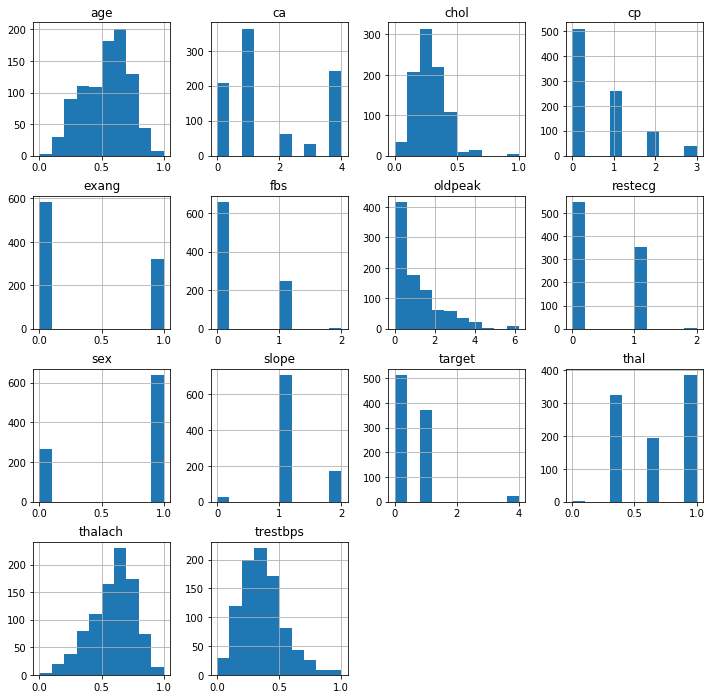

In [8]:
df.hist(figsize=(12,12))
plt.show()

In [9]:
from sklearn import model_selection

X = np.array(df.drop(['target'], axis=1))
y = np.array(df['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)

In [10]:
y_test[:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [11]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train,num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)

X_train[1]

(725, 5)
(182, 5)
(725, 13)


array([0.3125    , 0.24528302, 0.21461187, 0.75572519, 0.66666667,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 2.        , 0.        ])

In [12]:
X_train.shape[1]

13

In [13]:
X_train.shape[1],1

(13, 1)

In [14]:

def model1():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=128, activation="relu", input_shape=(13,)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=64, activation="relu"))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=32, activation="relu")) 
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=5, activation="softmax"))
  
  model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.0001), metrics=["accuracy"])
  
  return model

In [15]:
model = model1()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1

In [16]:
model.fit(X_train, Y_train, epochs=30, batch_size=10, verbose=True)

Epoch 1/30
73/73 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.1862
Epoch 2/30
73/73 [==============================] - 0s 1ms/step - loss: 0.4617 - accuracy: 0.4014
Epoch 3/30
73/73 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.4662
Epoch 4/30
73/73 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.5641
Epoch 5/30
73/73 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.5586
Epoch 6/30
73/73 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.5724
Epoch 7/30
73/73 [==============================] - 0s 1ms/step - loss: 0.3372 - accuracy: 0.5710
Epoch 8/30
73/73 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.5986
Epoch 9/30
73/73 [==============================] - ETA: 0s - loss: 0.3276 - accuracy: 0.59 - 0s 1ms/step - loss: 0.3198 - accuracy: 0.6041
Epoch 10/30
73/73 [==============================] - 0s 1ms/step - loss: 0.3

In [17]:
from sklearn.metrics import classification_report, accuracy_score
pred = np.round(model.predict(X_test)).astype(int)

print("Result for NN Model: ")
print(accuracy_score(Y_test, pred))
print(classification_report(Y_test, pred))

Result for NN Model: 
0.7912087912087912
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       106
           1       0.80      0.67      0.73        72
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         4

   micro avg       0.82      0.79      0.81       182
   macro avg       0.33      0.31      0.32       182
weighted avg       0.80      0.79      0.79       182
 samples avg       0.79      0.79      0.79       182



C:\Users\Srijith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srijith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srijith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Patient Accuracy: {}".format(test_accuracy))

6/6 [==============================] - 0s 661us/step - loss: 0.2029 - accuracy: 0.8132
Test Patient Accuracy: 0.8131868243217468


In [19]:
def model2():
##GRU Architecture##
# The GRU architecture
    model_GRU = Sequential()
# First GRU layer with Dropout regularisation
    model_GRU.add(GRU(units=128, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    model_GRU.add(Dropout(0.2))
# Second GRU layer
    model_GRU.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    model_GRU.add(Dropout(0.2))
# Third GRU layer
    model_GRU.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
    model_GRU.add(Dropout(0.2))
# Fourth GRU layer
    model_GRU.add(GRU(units=16, activation='tanh'))
    model_GRU.add(Dropout(0.2))
# The output layer
    model_GRU.add(Dense(units=5,activation='sigmoid'))
# Compiling the RNN
    model_GRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='binary_crossentropy')
    return model

In [20]:
model_GRU = model2()
print(model_GRU.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1

In [21]:
model_GRU.fit(X_train, Y_train, epochs=30, batch_size=10, verbose=True)

Epoch 1/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.7186
Epoch 2/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2380 - accuracy: 0.7379
Epoch 3/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2414 - accuracy: 0.7352
Epoch 4/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.7379
Epoch 5/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2296 - accuracy: 0.7407
Epoch 6/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2328 - accuracy: 0.7586
Epoch 7/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2356 - accuracy: 0.7338
Epoch 8/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.7310
Epoch 9/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.7476
Epoch 10/30
73/73 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.7559
Epoch 11/30
73/73 [

In [22]:
# Preccsion tracks false positives, Recall tracks false negatives
from sklearn.metrics import classification_report, accuracy_score

gru_pred = np.round(model_GRU.predict(X_test)).astype(int)

print("Result for GRU Model: ")
print(accuracy_score(Y_test, gru_pred))
print(classification_report(Y_test, gru_pred))

Result for GRU Model: 
0.8406593406593407
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       106
           1       0.83      0.76      0.80        72
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         4

   micro avg       0.85      0.84      0.85       182
   macro avg       0.34      0.34      0.34       182
weighted avg       0.83      0.84      0.83       182
 samples avg       0.84      0.84      0.84       182



In [23]:
test_loss, test_accuracy = model_GRU.evaluate(X_test, Y_test)
print("Test Patient Accuracy: {}".format(test_accuracy))

6/6 [==============================] - 0s 618us/step - loss: 0.1771 - accuracy: 0.8407
Test Patient Accuracy: 0.8406593203544617
